<img src="Logo.png" width="100" align="left"/> 

# <center>Data Analytics project:</center>



Congratulations on finishing the lessons content for this second unit !

We have seen a lot of concepts in the second unit and we had the chance to test some of them. Now, we get to see how these different concepts are used to better understand our data.

## Some guidelines: 
1. To run a cell you can use the shortcut use : Shift + Enter

2. Only sections mentioned as To-Do are the places where you should put in your own code other than that we do not recommend that you change the provided code.

3. You will be graded for the visibility of your code so make sure you respect the correct indentation and that your code contains suitable variables names.

4. This notebook is designed in a sequential way so if you solve your project on different days make sure to run the previous cells before you can run the one you want.

5. Teacher assistants in the slack space remain available to answer any questions you might have.

>Best of luck ! 

## Project Sections:
In this project you will practice some of the concepts seen in the data analytics unit, you will deal with a real dataset. This dataset contains house sale prices for King County. It includes homes sold between May 2014 and May 2015.

Our goal is to analyze this dataset, clean it then create a simple linear regression model using it.

This project is devided into n sections : 
1. [Setting the environement](#set_env)

2. [Importing necessary tools](#importing)

3. [Dataset discovery](#dataset_discovery)

4. [NA handling](#na_handling)

5. [Useless variables deletion](#useless_var)

6. [Outliers detection](#outliers)

7. [Feature selection](#feature_selection)

8. [Linear regression](#linear_reg)

### 1. Setting the environement:  <a id='set_env'></a>

In [1]:
# Make sure you have virtualenv installed 
!pip install --user virtualenv

In [2]:
# To-Do: create a virtual environement called data_analytics
!python -m venv data_analytics

In [3]:
# Activate the environement for windows
!data_analytics\Scripts\activate

In [4]:
# Activate the environement for linux (debian based)
#!. data_analytics/bin/activate

### 2. Importing necessary tools:<a id='importing'></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 3. Dataset discovery:<a id='dataset_discovery'></a>

In [6]:
# To-Do: Read the file ("kc_house_data.csv") using pandas and store in a dataframe called df
df = pd.read_csv("kc_house_data.csv")

# To-Do: Print the dataframe's shape
df.shape

(21613, 21)

In [7]:
# To-Do: Print the dataframe's info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21606 non-null  object 
 2   price          21608 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21612 non-null  float64
 6   sqft_lot       21612 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21609 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21611 non-null  float64
 15  yr_renovated   21612 non-null  float64
 16  zipcode        21611 non-null  float64
 17  lat            21612 non-null  float64
 18  long  

### 4. NA handling:<a id='na_handling'></a>
It is clear after printing the dataset info that there are some variables that have less entries than the number of rows which means that some of them don't have values in certain rows.

Given the number of the na values, what do you think is the best method to deal with them?

*Let's first get the number of NA values for each column of our dataframe*

In [8]:
df.isna().sum()

id               0
date             7
price            5
bedrooms         0
bathrooms        0
sqft_living      1
sqft_lot         1
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       4
sqft_basement    0
yr_built         2
yr_renovated     1
zipcode          2
lat              1
long             0
sqft_living15    1
sqft_lot15       0
dtype: int64

*There aren't many NA values. The ones that we must deal with the most are in the price and sqft_living columns, because those two are necessairy during our model training. Seeing that there are only few NA values in our dataframe, we can get rid of them by deleting them completely*

In [9]:
# To-Do: deal with the NAs in your dataset in one line
df.dropna(inplace=True)

### 5. Useless variables deletion:<a id='useless_var'></a>
We want to eventually do a regression on it so naturally some variables bring no added value and can be delted without impacting the results.

Delete the column that correspond to variables that aren't needed.

*The variables that would seem insignificant to our model are the following ones :*
***
**date**
***
**yr_built** *and* **yr_renovated** *:* **condition** *and* **grade** *are enough to give us insight on the house's condition*
***
**zipcode**, **lat** *and* **long** *: We never look at a house's coordinates and zipcode when choosing a house.* **waterfront** *and* **view** *are more significant*.
***
**sqft_living15** *and* **sqft_lot15** *: we already have* **sqft_living** *and* **sqft_lot** *as significant variables. The former ones are just redundancy.*

In [10]:
# To-Do: delete the values of the variables that are useless
df.drop(['date', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], axis=1, inplace=True)

In [11]:
list(df.columns)

['id',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement']

### A wild playground appears !!
In the next cell, go wild with the dataset discovery.
You can calculate the mean, the median or do anything you want to learn more the data.

<b>Pro tip :</b> 
Sometimes you might want to know how many unique variables a column has, to do so you can use the padas function :

<center>pd.unique(df['column_name'])</center>

*Let's check out the ratio of unique values for each column on the total number of entries*

In [12]:
# To-Do : get to know more your data WITHOUT modifying it !!

#Checking for unique values
print('Total number of entries : '+str(len(df))+'\n')
print('Unique values')
for col in df.drop(['id'], axis=1).columns:
    print(col+' : '+str(len(pd.unique(df[col])))+'    ----->    ratio : '+str(len(pd.unique(df[col]))/len(df)))

Total number of entries : 21588

Unique values
price : 4025    ----->    ratio : 0.1864461738002594
bedrooms : 13    ----->    ratio : 0.0006021863998517695
bathrooms : 30    ----->    ratio : 0.0013896609227348527
sqft_living : 1036    ----->    ratio : 0.04798962386511025
sqft_lot : 9773    ----->    ratio : 0.4527052065962572
floors : 6    ----->    ratio : 0.00027793218454697053
waterfront : 2    ----->    ratio : 9.264406151565684e-05
view : 5    ----->    ratio : 0.0002316101537891421
condition : 5    ----->    ratio : 0.0002316101537891421
grade : 12    ----->    ratio : 0.0005558643690939411
sqft_above : 943    ----->    ratio : 0.0436816750046322
sqft_basement : 306    ----->    ratio : 0.014174541411895497


*Clearly, **continuous** variables display a higher ratio than **discrete** ones*

*Now, let's visualize our data using histograms*

array([[<AxesSubplot:title={'center':'sqft_basement'}>]], dtype=object)

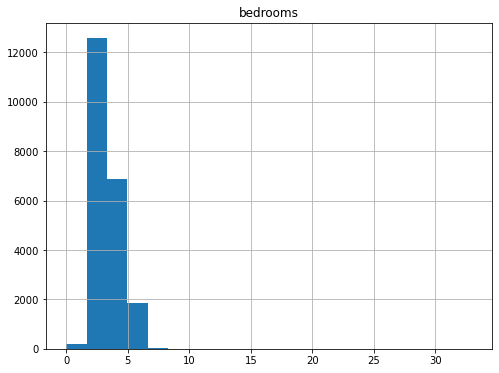

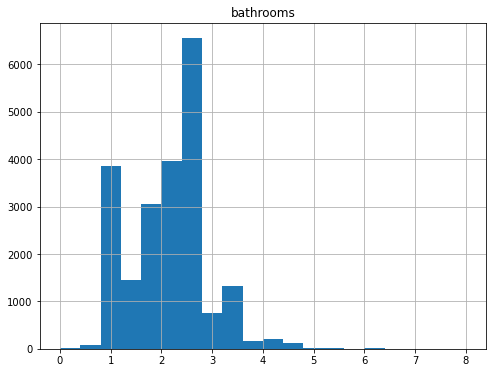

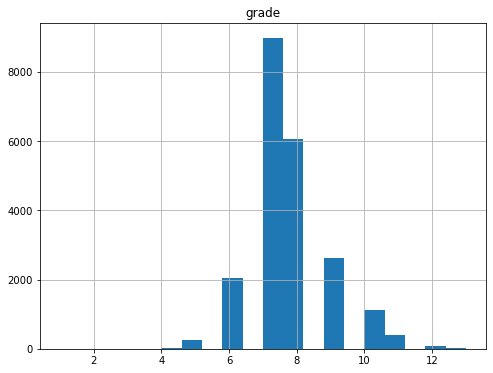

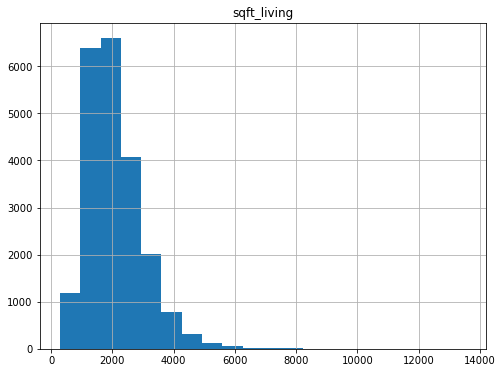

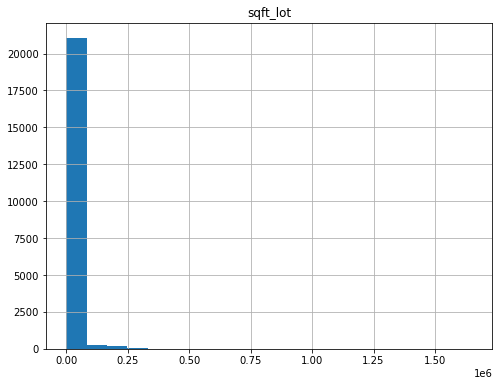

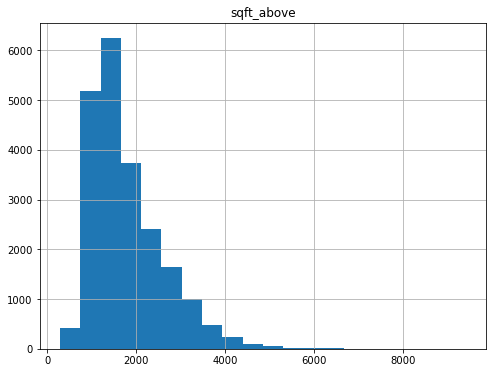

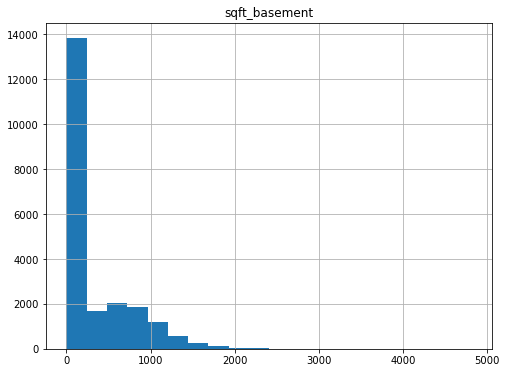

In [13]:
df.hist(column=['bedrooms'],bins=20, figsize=(8,6))
df.hist(column=['bathrooms'],bins=20, figsize=(8,6))
df.hist(column=['grade'],bins=20, figsize=(8,6))
df.hist(column=['sqft_living'],bins=20, figsize=(8,6))
df.hist(column=['sqft_lot'],bins=20, figsize=(8,6))
df.hist(column=['sqft_above'],bins=20, figsize=(8,6))
df.hist(column=['sqft_basement'],bins=20, figsize=(8,6))

*By looking at* **sqft_basement** *'s histogram, we can tell that there's a big difference between the area 0 and the other area values. We cannot leave it this way, and if we apply an outlier detection, it'll remove them, keeping the value 0 only, which won't prove beneficial at all. To confirm this, let's have a look at the percentage of records that have a* **sqft_basement** *'value of 0, and that of those which don't*

In [14]:
print('sqft_basement = 0 : '+str(round(len(df[df['sqft_basement'] == 0])/len(df)*100))+'%')
print('sqft_basement > 0 : '+str(round(len(df[df['sqft_basement'] >  0])/len(df)*100))+'%')

sqft_basement = 0 : 61%
sqft_basement > 0 : 39%


*What this means is that the area of a basement is not as significant as its presence. So, we'll replace the column* **sqft_basement** *by* **basement** *, which takes the value 0 for the asbence of a basement, and 1 for its presence in the house represented by the record*

array([[<AxesSubplot:title={'center':'basement'}>]], dtype=object)

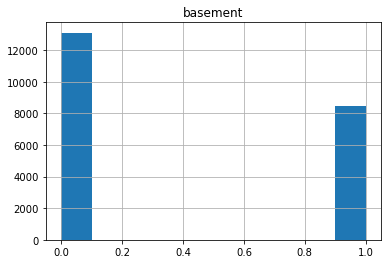

In [15]:
df.loc[df['sqft_basement'] > 0, 'sqft_basement'] = 1
df.rename(columns={'sqft_basement' : 'basement'}, inplace=True)

df.hist(column=['basement'])

*At a first, **sqft_lot** seems to have a similar behaviour, but here's what happens when we try to print the percentages the way we did with sqft_basement*

In [16]:
print('sqft_lot = 0 : '+str(round(len(df[df['sqft_lot'] == 0])/len(df)*100))+'%')
print('sqft_lot > 0 : '+str(round(len(df[df['sqft_lot'] >  0])/len(df)*100))+'%')

sqft_lot = 0 : 0%
sqft_lot > 0 : 100%


*We'll have to just leave it to the outlier detection alongside the other variables*

### 6.Outliers detection:<a id='outliers'></a>
Having outliers is a common problem that might affect the quality of the model that we're building.

Let's assume that we're not interested in very expensive or very cheap houses, we want a model that best fits the average priced houses.

To create such a model, we detect outliers and delete them using the Z-score method seen in the lessons.

*We first get the columns on which we want to detect outliers*

In [17]:
outl_cols = ['bedrooms', 'bathrooms', 'grade', 'sqft_living', 'sqft_lot', 'sqft_above']

In [18]:
# To-Do : detect the outliers then delete them ad delete the column created to calculate the Z-score
old_len = len(df)

z_thresh = 3

for col in outl_cols:
    df[col+'_zscore'] = abs(df[col] - df[col].mean())/df[col].std()
    df = df[df[col+'_zscore'] < z_thresh]
    df.drop(col+'_zscore', axis=1, inplace=True)

print(len(df)/old_len)

0.9509449694274597


*The percentage of outliers we've removed from our dataframe is :*

In [19]:
print('about '+str(round((old_len - len(df))/old_len * 100))+'% was removed')

about 5% was removed


### 7.Feature selection:<a id='feature_selection'></a>
It is clear that even after deleting some features, there might be other features that aren't obviously useless but can be delted and keep a good overall performance.

To verify this, we perform feature selection on our variables.

<AxesSubplot:>

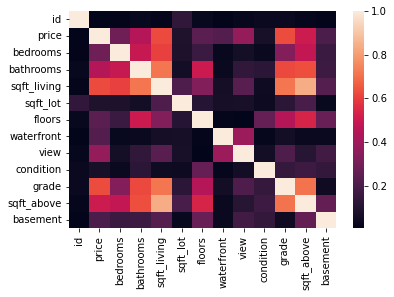

In [20]:
# To-Do : perform feature selection using correlation
import seaborn as sb
sb.heatmap(abs(df.corr()))

In [21]:
abs(df.corr())['price']

id             0.004112
price          1.000000
bedrooms       0.281943
bathrooms      0.444498
sqft_living    0.624050
sqft_lot       0.082180
floors         0.237462
waterfront     0.220985
view           0.376297
condition      0.068914
grade          0.629374
sqft_above     0.504811
basement       0.200257
Name: price, dtype: float64

In [22]:
# To-Do : drop the variables that seem highly correlated to you
corr_thresh = 0.9

cols = df.drop(['id', 'price'], axis=1).columns
for col in cols:
    if abs(df.corr()['price'].loc[col]) > corr_thresh:
        df.drop(col, axis=1, inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20529 entries, 0 to 21612
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           20529 non-null  int64  
 1   price        20529 non-null  float64
 2   bedrooms     20529 non-null  int64  
 3   bathrooms    20529 non-null  float64
 4   sqft_living  20529 non-null  float64
 5   sqft_lot     20529 non-null  float64
 6   floors       20529 non-null  float64
 7   waterfront   20529 non-null  int64  
 8   view         20529 non-null  int64  
 9   condition    20529 non-null  int64  
 10  grade        20529 non-null  int64  
 11  sqft_above   20529 non-null  float64
 12  basement     20529 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 2.2 MB


### 8.Linear regression:<a id='linear_reg'></a>
Now that our data is clean and ready to be used, let's try to fit it into a linear regression model.

<ul>
    <li>We begin by splitting our variables into dependant and independant variables.</li>
    <li>We create the model using the LinearRegression class.</li>
    <li>We evaluate our model using the R² score</li>
</ul>

In [24]:
# Splitting the data into dependant and independant variables
Y = df['price']
X = df.drop(['price'],axis = 1)

In [25]:
from sklearn.linear_model import LinearRegression
# To-Do : Create a linear regression model using the LinearRegression class then fit it to the data
model = LinearRegression()
result = model.fit(X,Y)

In [26]:
# The function used to calculate the R² score is the method "score" found in the LinearRegression class
result.score(X,Y)

0.5465044857226248

## Conclusion:
Data preparation is a very important step in the machine learning pipeline. It is crucial to clean our data and understand it very well before we can create any model on the data.

In this notebook, we have spent 4 steps preparing our data but only 1 to create the model. This reflects how time consuming the process of data preparation is compared to the other steps as well as the importance of the quality of the data used.

In the next unit, we will see more about the models creation process and see a lot of important concepts in depth.